
0: 128x128 2 Insects, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 20.4ms
Speed: 1.0ms preprocess, 20.4ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 20.3ms
Speed: 1.0ms preprocess, 20.3ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 21.4ms
Speed: 1.2ms preprocess, 21.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 22.0ms
Speed: 0.0ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 2 Insects, 40.3ms
Speed: 1.3ms preprocess, 40.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 23.8ms
Speed: 0.0ms preprocess, 23.8ms inference, 0.

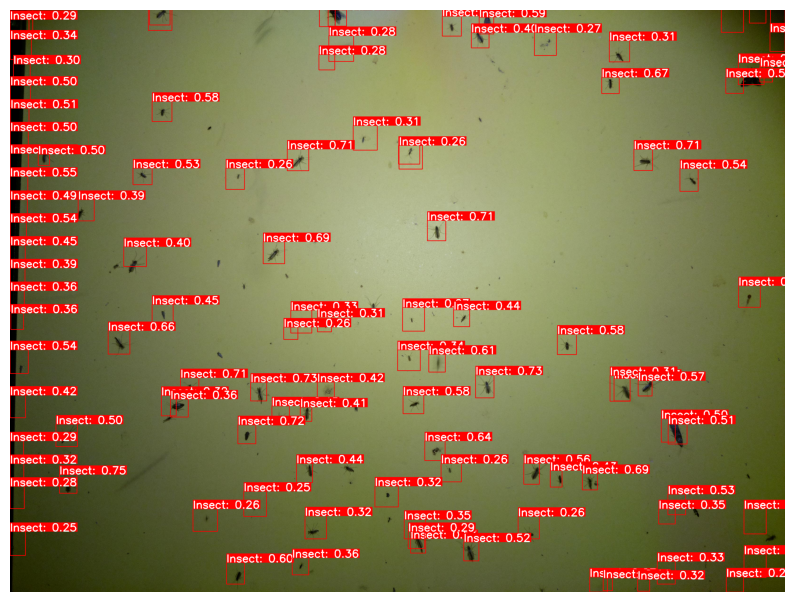

In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

def split_image_with_overlap(image, tile_size, overlap):
    h, w, _ = image.shape
    step = tile_size - overlap
    tiles = []
    for y in range(0, h, step):
        for x in range(0, w, step):
            tiles.append((x, y, image[y:y+tile_size, x:x+tile_size]))
    return tiles

def draw_boxes(image, boxes, offset_x=0, offset_y=0):
    for box in boxes:
        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = int(x1 + offset_x), int(y1 + offset_y), int(x2 + offset_x), int(y2 + offset_y)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = f"Insect: {conf:.2f}"
        font_scale = 1.5  # Adjusted font scale for better readability
        thickness = 3  # Adjusted thickness for better readability
        (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        cv2.rectangle(image, (x1, y1 - h - 4), (x1 + w, y1), (255, 0, 0), -1)  # Background rectangle for better readability
        cv2.putText(image, label, (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)
    return image

# Load the trained model
model = YOLO("runs/detect/train9/weights/best.pt")

# Load the image
image_path = "20200809000003-1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into tiles with overlap
tile_size = 128
overlap = 32  # 25% overlap
tiles = split_image_with_overlap(image_rgb, tile_size, overlap)

# Run inference on each tile and draw boxes
for x, y, tile in tiles:
    results = model(tile)
    detected_objects = results[0].boxes.data.cpu().numpy()
    draw_boxes(image_rgb, detected_objects, offset_x=x, offset_y=y)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
